In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# import os
# import matplotlib.pyplot as plt
# import numpy as np
# from skimage.io import imread
# from skimage.transform import resize

# Reshaping the data and storing

In [4]:
# import os
# import cv2
# from PIL import Image
# import pandas as pd

# DATADIR = '/content/drive/MyDrive/melanoma_data/train'
# CATEGORIES = ['benign', 'malignant']
# SAVE_DIRECTORY = '/content/drive/MyDrive/melanoma_data/Melanoma_data/train'
# SAVE_CATEGORIES = ['benign', 'malignant']

# for i in range(2):
#   class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
#   path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
#   for img in os.listdir(path):
#     img_array = imread(os.path.join(path, img))

#     # Resize image
#     Resize_image = Image.fromarray(np.array(img_array))
#     Resize_image = Resize_image.resize((224,224))

#     # set the path
#     image_path1 = os.path.join(SAVE_DIRECTORY, SAVE_CATEGORIES[i])
#     image_path2 = os.path.join(image_path1, img)

#     Resize_image.save(image_path2)
#     # cv2.imwrite(image_path2, Resize_image.astype(np.uint8))


In [5]:
# DATADIR = '/content/drive/MyDrive/melanoma_data/test'
# CATEGORIES = ['benign', 'malignant']
# SAVE_DIRECTORY = '/content/drive/MyDrive/melanoma_data/Melanoma_data/test'
# SAVE_CATEGORIES = ['benign', 'malignant']

# for i in range(2):
#   class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
#   path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
#   for img in os.listdir(path):
#     img_array = imread(os.path.join(path, img))

#     # Resize image
#     Resize_image = Image.fromarray(np.array(img_array))
#     Resize_image = Resize_image.resize((224,224))

#     # set the path
#     image_path1 = os.path.join(SAVE_DIRECTORY, SAVE_CATEGORIES[i])
#     image_path2 = os.path.join(image_path1, img)

#     Resize_image.save(image_path2)
#     # cv2.imwrite(image_path2, Resize_image.astype(np.uint8))


In [6]:

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

# to flatten an array - a.flatten() where a is a numpy arrayy
target = []
images = []

DATADIR = '/content/drive/MyDrive/melanoma_data/Melanoma_data/train/'
CATEGORIES = ['benign', 'malignant']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # img_resized = resize(img_array, (224,224,3))
    images.append(img_array)
    target.append(i)

# flat_data = np.array(flat_data)
train_target = np.array(target)
train_images = np.array(images)

In [7]:
target = []
images = []

DATADIR = '/content/drive/MyDrive/melanoma_data/Melanoma_data/test/'
CATEGORIES = ['benign', 'malignant']
for i in range(2):
  class_num = CATEGORIES.index(CATEGORIES[i])   #label encoding the categories
  path = os.path.join(DATADIR, CATEGORIES[i])   # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    # img_resized = resize(img_array, (224,224,3))
    images.append(img_array)
    target.append(i)

# flat_data = np.array(flat_data)
test_target = np.array(target)
test_images = np.array(images)

In [8]:
X_train = train_images
X_test = test_images
y_train = train_target
y_test = test_target

# true values
y_train_ = train_target
y_test_ = test_target

In [9]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(images, target, test_size = 0.2, stratify = target, random_state = 2)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (300, 224, 224, 3)
X_test Shape:  (50, 224, 224, 3)
y_train Shape:  (300, 2)
y_test Shape:  (50, 2)


##Defining Error Metrics

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    labels = ['Malignant', 'Benign']
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

def evaluate(model, X, y_true, y_pred):

  # classification report
  print(classification_report(y_true, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  print("CONFUSION MATRIX: \n", plot_confusion_matrix(cm))

  # Accuracy score
  accuracy = accuracy_score(y_true, y_pred)
  print("ACCURACY: ", accuracy)

  # Recall Score
  recall = recall_score(y_true, y_pred)
  print("RECALL: ", recall)

  # Assuming y_true contains the ground truth labels and y_pred_prob contains the predicted probabilities
  y_pred_prob = model.predict(X)[:, 1]
  fpr, tpr, thresholds_roc = roc_curve(y_true, y_pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_true, y_pred_prob)

  # Plotting the ROC curve
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.show()

  # Plotting the Precision-Recall curve
  plt.plot(recall, precision)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()



In [14]:
!pip install simple_colors

In [15]:
from simple_colors import *
def error_metrics_record(model,y_train, y_train_pred, y_test, y_test_pred, x_test, x_train):
  print('------------------------------------------------------')
  print('------------------------------------------------------')
  print(red('TRAIN DATA EVALUATION', 'bold'))
  evaluate(model, x_train, y_train, y_train_pred)
  print('------------------------------------------------------')
  print(red('TEST DATA EVALUATION', 'bold'))
  evaluate(model, x_test, y_test, y_test_pred)
  print('------------------------------------------------------')
  print('------------------------------------------------------')

In [16]:
from sklearn.metrics import classification_report

def results(model, X_test, X_train, y_train_, y_test_):
    # Prediction of values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # labeling the values
    y_test_pred_ = []
    for i in range(len(y_test_pred)):
        if y_test_pred[i][0] > y_test_pred[i][1]:
            y_test_pred_.append(0)
        else:
            y_test_pred_.append(1)

    y_train_pred_ = []
    for i in range(len(y_train_pred)):
        if y_train_pred[i][0] > y_train_pred[i][1]:
            y_train_pred_.append(0)
        else:
            y_train_pred_.append(1)

    # evaluation
    error_metrics_record(model,y_train_, y_train_pred_, y_test_, y_test_pred_, X_test, X_train)

# Xception

In [25]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the Xception model without the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the Xception base and a custom classification layer
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

# model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_16 (Dense)            (None, 512)               51380736  
                                                                 
 dense_17 (Dense)            (None, 32)                16416     
                                                                 
 dense_18 (Dense)            (None, 2)                 66        
                                                                 
Total params: 72,258,698
Trainable params: 51,397,218
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/10
10/10 [===============

10/10 [==============================] - 74s 7s/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



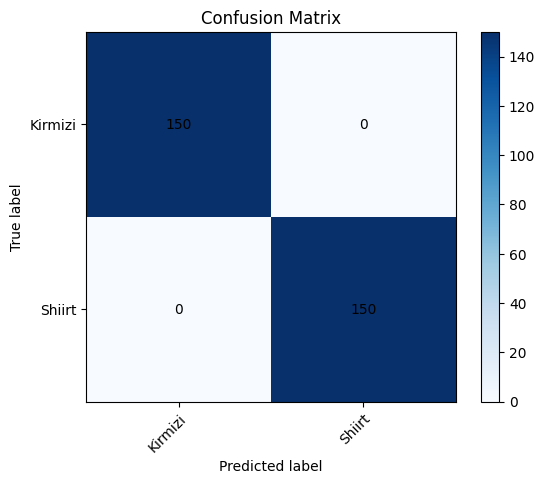

CONFUSION MATRIX: 
 None
ACCURACY:  1.0
RECALL:  1.0
10/10 [==============================] - 73s 7s/step


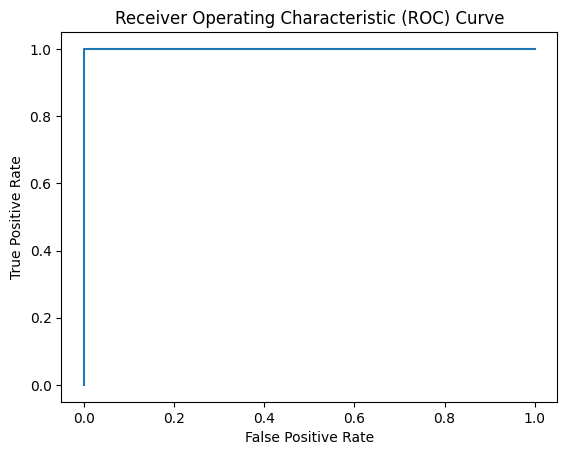

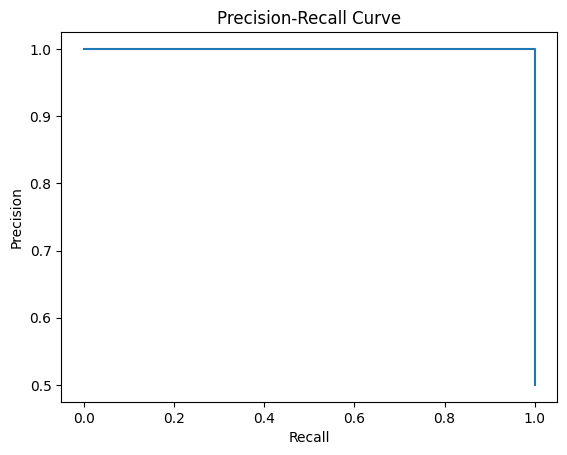

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.77      0.80      0.78        25

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



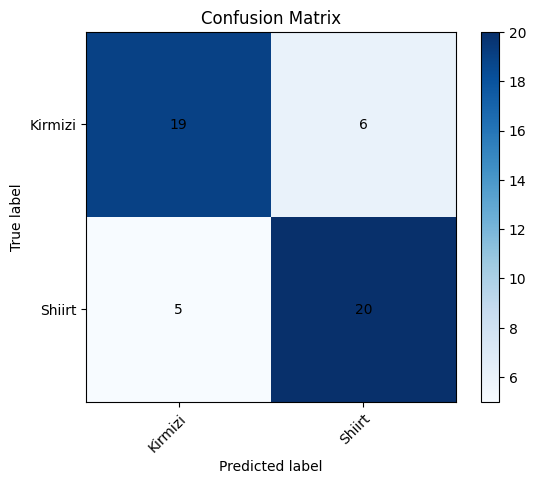

CONFUSION MATRIX: 
 None
ACCURACY:  0.78
RECALL:  0.8
2/2 [==============================] - 11s 4s/step


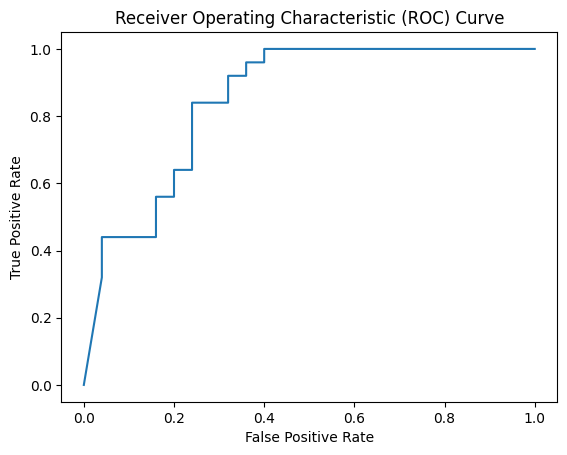

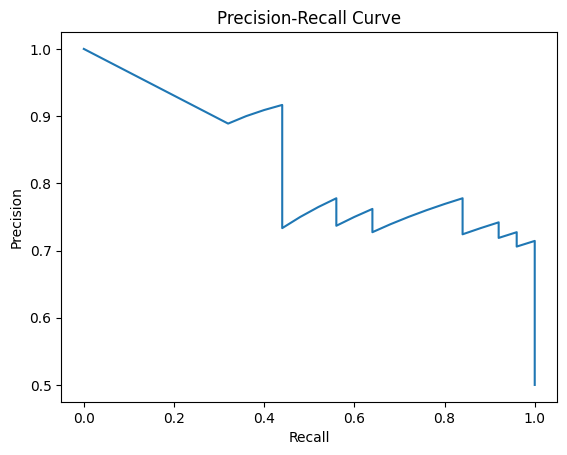

------------------------------------------------------
------------------------------------------------------


In [26]:
results(model, X_test, X_train, y_train_, y_test_)

# Densenet

In [20]:
from keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the Xception base and a custom classification layer
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

# model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 32)                16416     
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                       

10/10 [==============================] - 52s 5s/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



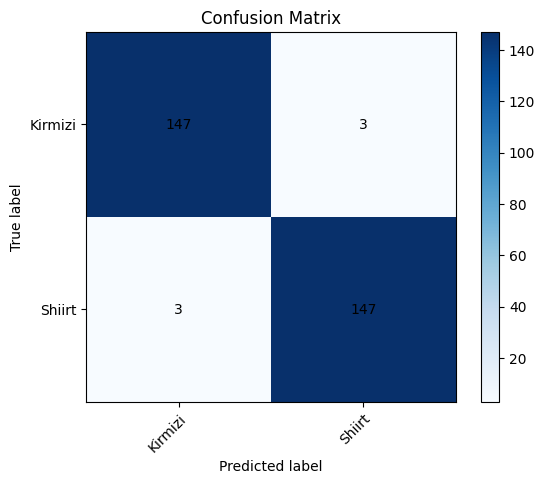

CONFUSION MATRIX: 
 None
ACCURACY:  0.98
RECALL:  0.98
10/10 [==============================] - 52s 5s/step


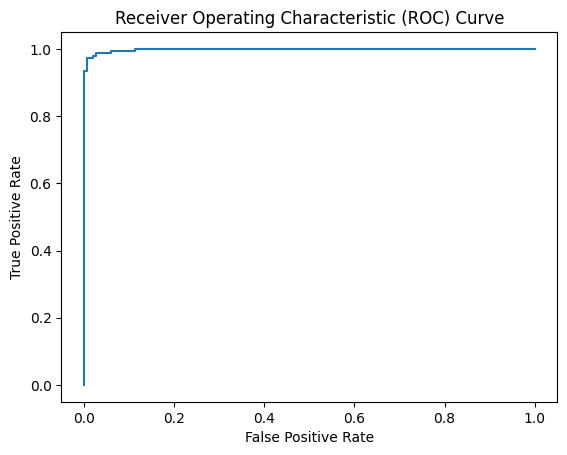

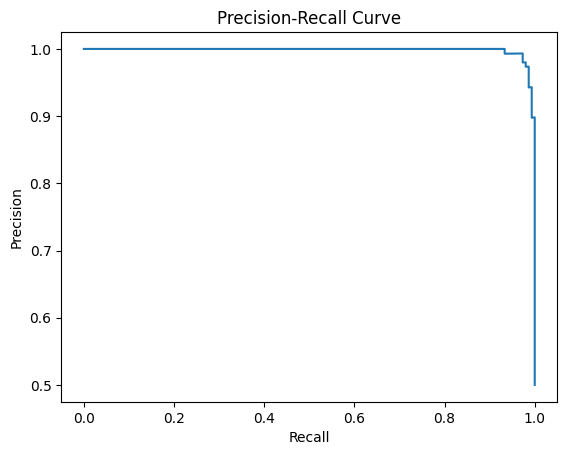

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.80      0.80      0.80        25

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



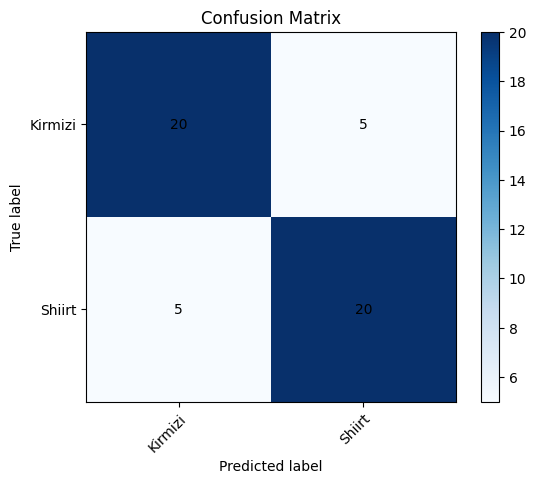

CONFUSION MATRIX: 
 None
ACCURACY:  0.8
RECALL:  0.8
2/2 [==============================] - 9s 3s/step


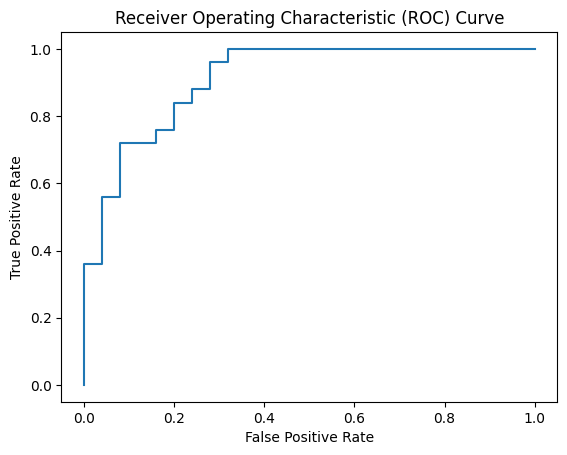

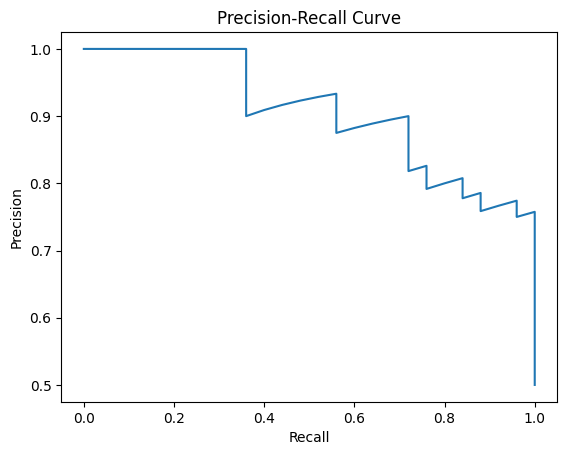

------------------------------------------------------
------------------------------------------------------


In [21]:
results(model, X_test, X_train, y_train_, y_test_)

# Inception

In [23]:
from keras.applications import InceptionV3

# Load the InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the Xception base and a custom classification layer
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

# model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_12 (Dense)            (None, 1024)              52429824  
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 32)                16416     
                                                                 
 dense_15 (Dense)            (None, 2)                 66        
                                                                 
Total params: 74,773,890
Trainable params: 52,971,106


In [24]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

results(model, X_test, X_train, y_train_, y_test_)

Epoch 1/10
10/10 [==============================] - 64s 5s/step - loss: 9.3670 - accuracy: 0.4967
Epoch 2/10
10/10 [==============================] - 48s 5s/step - loss: 0.7267 - accuracy: 0.4867
Epoch 3/10
10/10 [==============================] - 47s 5s/step - loss: 0.7176 - accuracy: 0.4133
Epoch 4/10
10/10 [==============================] - 48s 5s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 47s 5s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/10
 9/10 [==========================>...] - ETA: 4s - loss: 0.6931 - accuracy: 0.5035

KeyboardInterrupt: ignored

# MobileNet

In [27]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Load the MobileNet model without the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the MobileNet base and a custom classification layer
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 dense_19 (Dense)            (None, 512)               25690624  
                                                                 
 dense_20 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 28,920,514
Trainable params: 25,691,650
Non-trainable params: 3,228,864
_________________________________________________________________
Epoch 1/10
10/10 [=================

10/10 [==============================] - 15s 1s/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



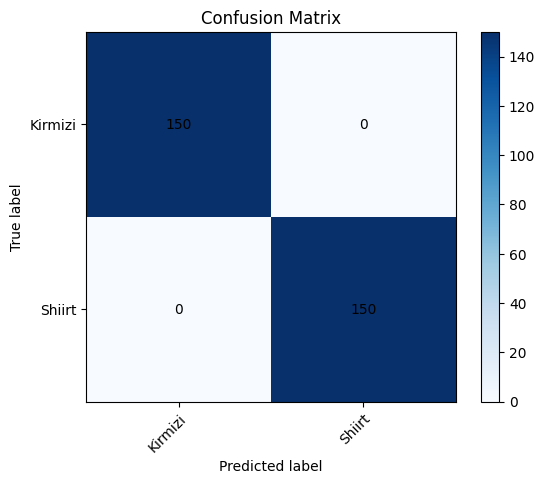

CONFUSION MATRIX: 
 None
ACCURACY:  1.0
RECALL:  1.0
10/10 [==============================] - 14s 1s/step


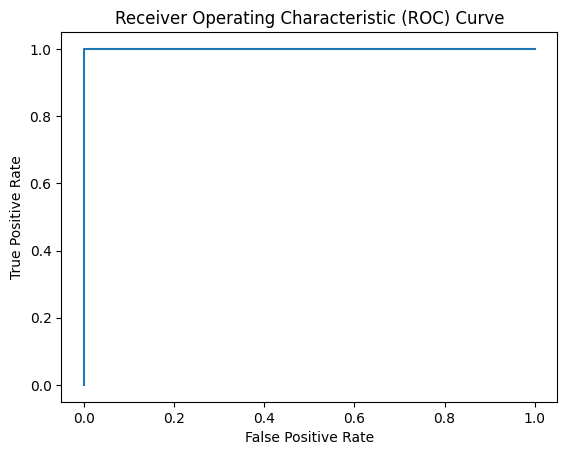

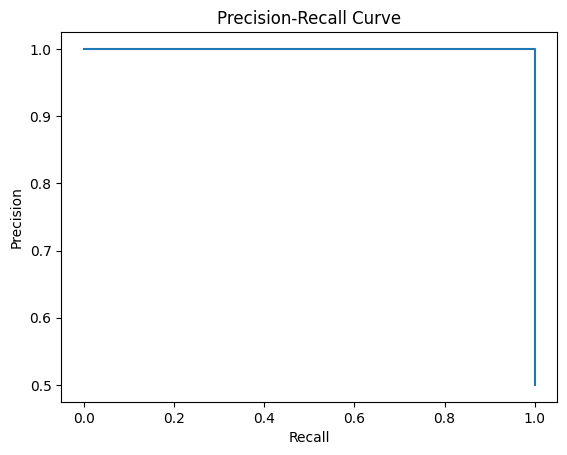

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.78      0.84      0.81        25

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



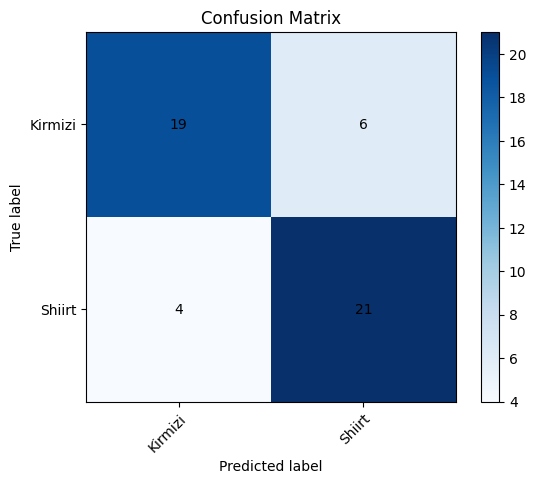

CONFUSION MATRIX: 
 None
ACCURACY:  0.8
RECALL:  0.84
2/2 [==============================] - 2s 747ms/step


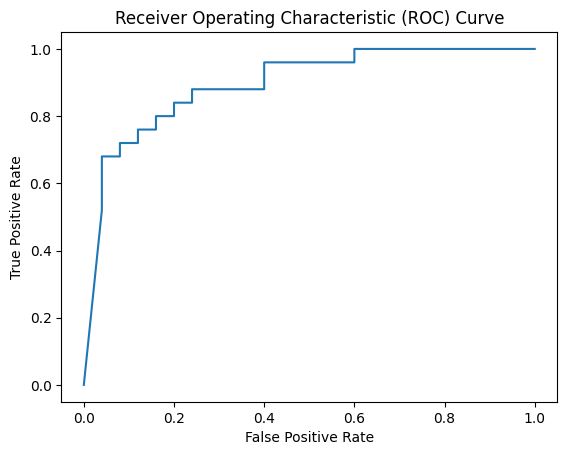

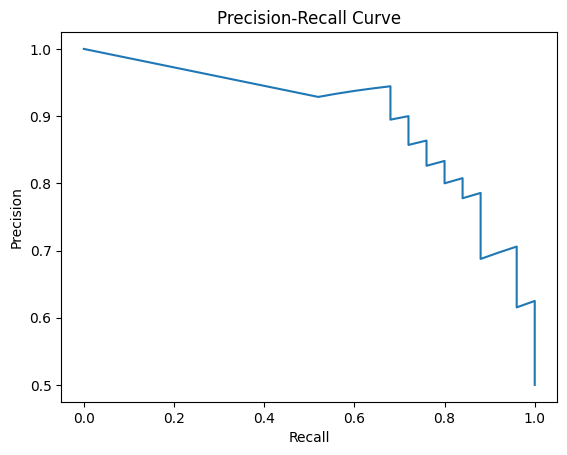

------------------------------------------------------
------------------------------------------------------


In [28]:
results(model, X_test, X_train, y_train_, y_test_)

#Resnet

In [33]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense

# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the ResNet50 base and a custom classification layer
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 100352)            0         
                                                                 
 dense_26 (Dense)            (None, 512)               51380736  
                                                                 
 dense_27 (Dense)            (None, 32)                16416     
                                                                 
 dense_28 (Dense)            (None, 2)                 66        
                                                                 
Total params: 74,984,930
Trainable params: 51,397,218
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/10
10/10 [===============

10/10 [==============================] - 61s 6s/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       0.95      0.12      0.21       150
           1       0.53      0.99      0.69       150

    accuracy                           0.56       300
   macro avg       0.74      0.56      0.45       300
weighted avg       0.74      0.56      0.45       300



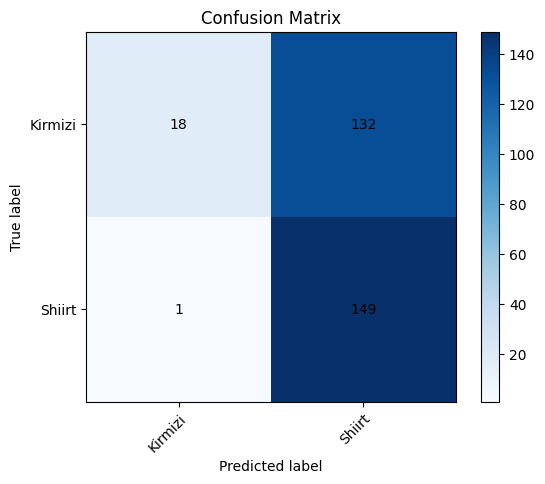

CONFUSION MATRIX: 
 None
ACCURACY:  0.5566666666666666
RECALL:  0.9933333333333333
10/10 [==============================] - 60s 6s/step


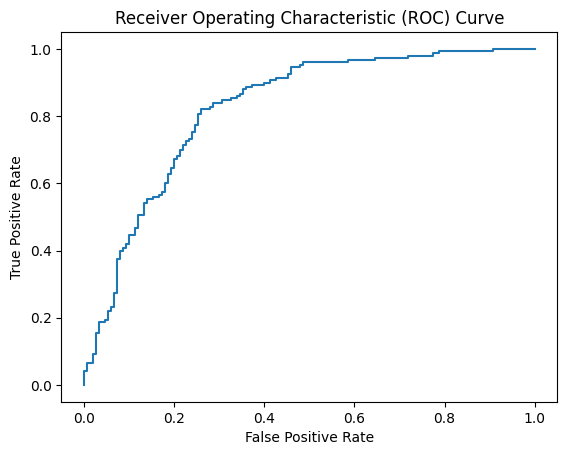

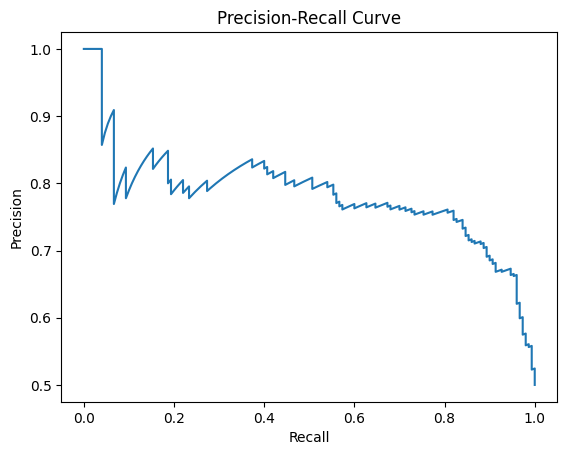

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.51      1.00      0.68        25

    accuracy                           0.52        50
   macro avg       0.76      0.52      0.38        50
weighted avg       0.76      0.52      0.38        50



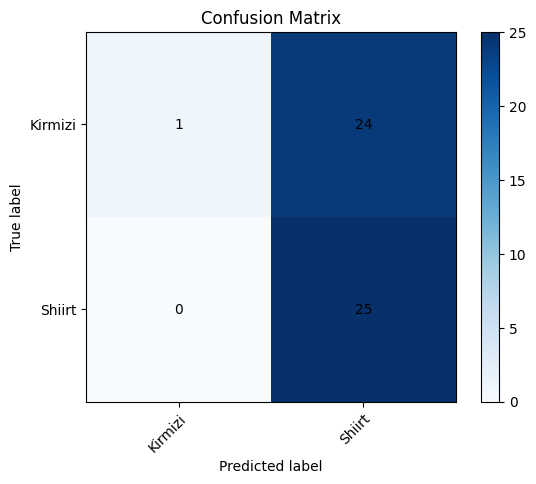

CONFUSION MATRIX: 
 None
ACCURACY:  0.52
RECALL:  1.0
2/2 [==============================] - 11s 3s/step


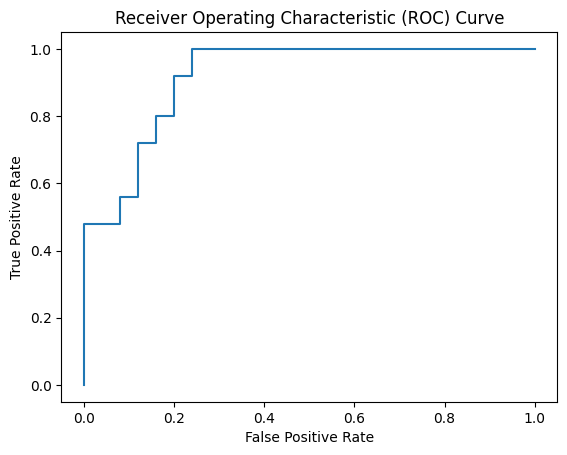

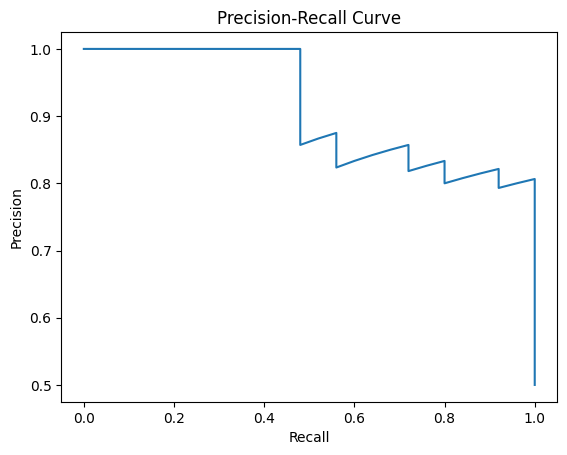

------------------------------------------------------
------------------------------------------------------


In [34]:
results(model, X_test, X_train, y_train_, y_test_)

# VGG

In [36]:
from keras.applications import VGG16
from keras.layers import Dropout

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the VGG16 base and a custom classification layer
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(Dense(1024, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 25088)             0         
                                                                 
 dense_33 (Dense)            (None, 1024)              25691136  
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dense_35 (Dense)            (None, 32)                16416     
                                                                 
 dense_36 (Dense)            (None, 2)                 66        
                                                                 
Total params: 40,947,106
Trainable params: 26,232,418

10/10 [==============================] - 188s 19s/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       1.00      0.74      0.85       150
           1       0.79      1.00      0.88       150

    accuracy                           0.87       300
   macro avg       0.90      0.87      0.87       300
weighted avg       0.90      0.87      0.87       300



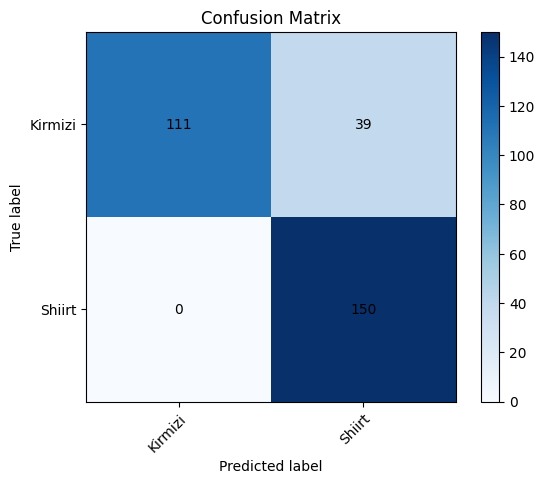

CONFUSION MATRIX: 
 None
ACCURACY:  0.87
RECALL:  1.0
10/10 [==============================] - 200s 20s/step


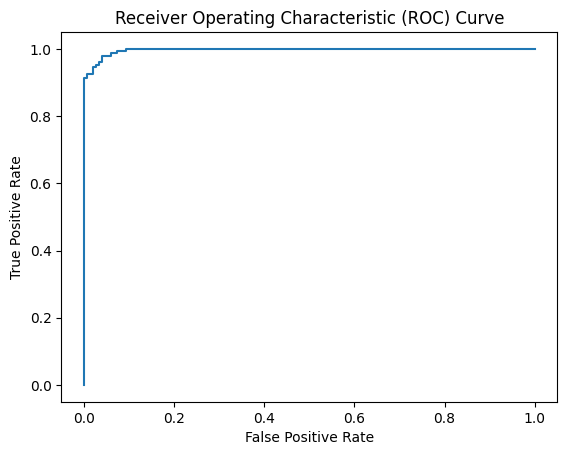

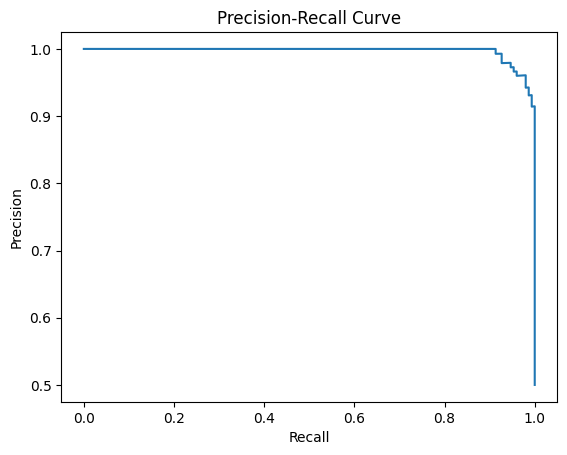

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.92      0.48      0.63        25
           1       0.65      0.96      0.77        25

    accuracy                           0.72        50
   macro avg       0.79      0.72      0.70        50
weighted avg       0.79      0.72      0.70        50



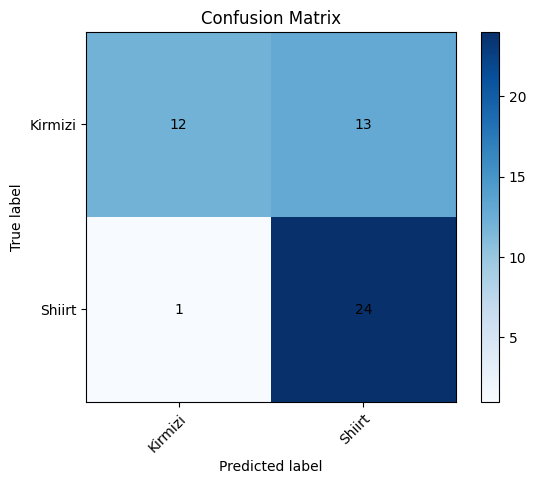

CONFUSION MATRIX: 
 None
ACCURACY:  0.72
RECALL:  0.96
2/2 [==============================] - 32s 10s/step


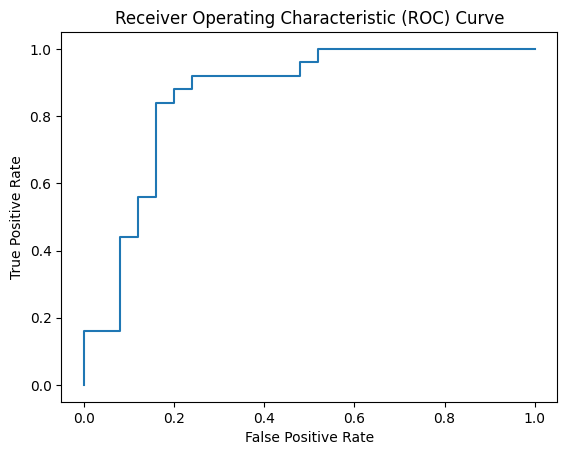

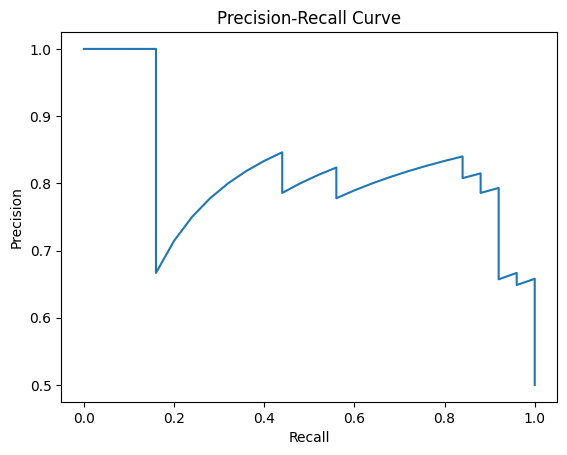

------------------------------------------------------
------------------------------------------------------


In [37]:
results(model, X_test, X_train, y_train_, y_test_)

# EfficientNet

In [38]:
!pip install tensorflow efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [39]:
import tensorflow as tf
import efficientnet.tfkeras as efn
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

16804768/16804768 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                             

10/10 [==============================] - 35s 4s/step
------------------------------------------------------
------------------------------------------------------
TRAIN DATA EVALUATION
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       150
           1       0.88      0.52      0.65       150

    accuracy                           0.72       300
   macro avg       0.77      0.72      0.71       300
weighted avg       0.77      0.72      0.71       300



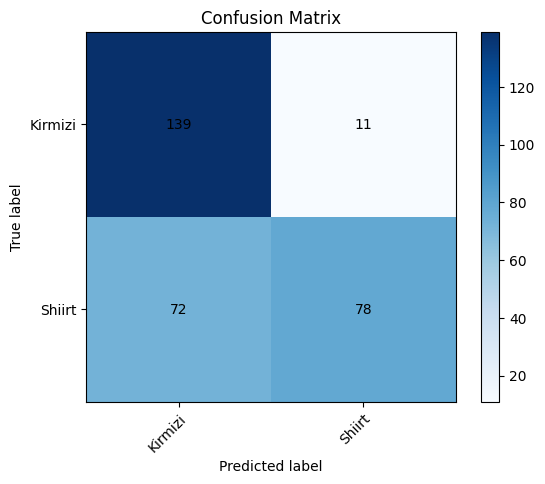

CONFUSION MATRIX: 
 None
ACCURACY:  0.7233333333333334
RECALL:  0.52
10/10 [==============================] - 20s 2s/step


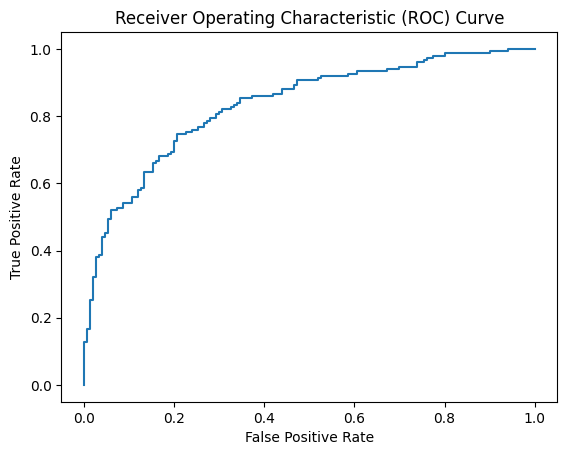

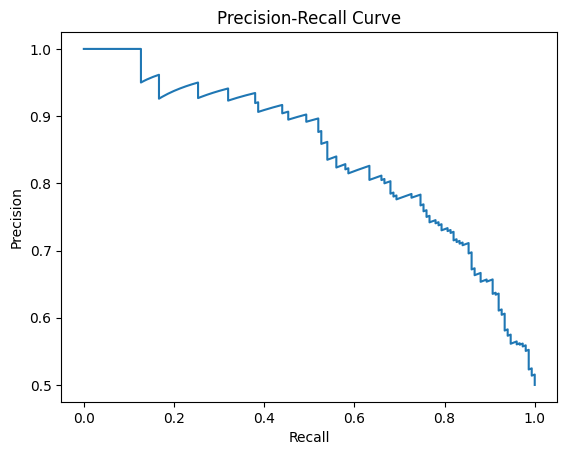

------------------------------------------------------
TEST DATA EVALUATION
              precision    recall  f1-score   support

           0       0.54      0.80      0.65        25
           1       0.62      0.32      0.42        25

    accuracy                           0.56        50
   macro avg       0.58      0.56      0.53        50
weighted avg       0.58      0.56      0.53        50



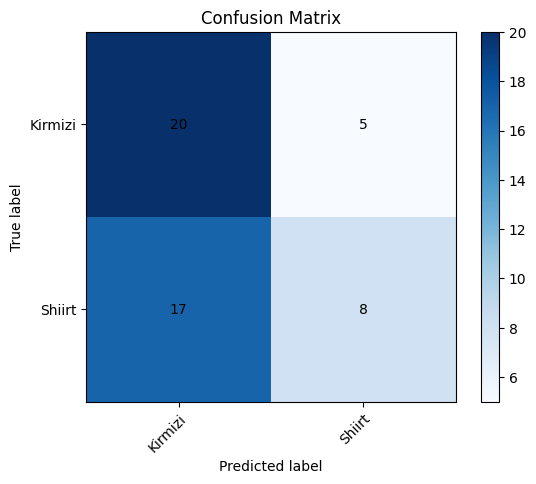

CONFUSION MATRIX: 
 None
ACCURACY:  0.56
RECALL:  0.32
2/2 [==============================] - 3s 1s/step


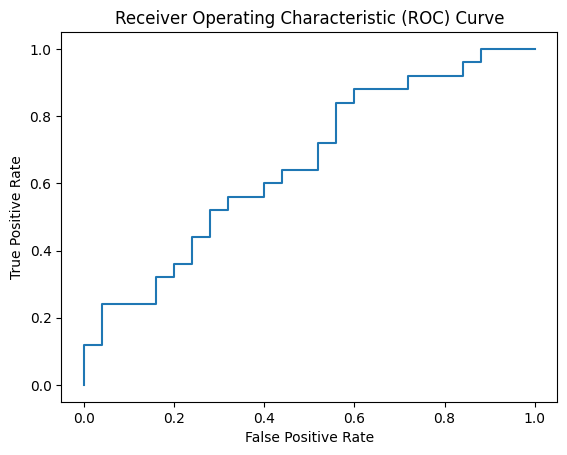

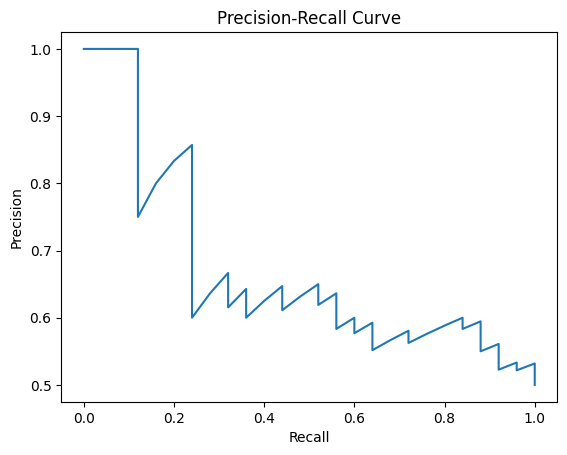

------------------------------------------------------
------------------------------------------------------


In [40]:
results(model, X_test, X_train, y_train_, y_test_)